<a href="https://www.kaggle.com/code/haotienkuo/titanic-survival-prediction?scriptVersionId=106871462" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Set Up the Data
1. Read in the data
2. Check for nan values

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

print(train_df.shape, test_df.shape)
train_df.head(10)

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
print(train_df.isna().sum())

#Replace nan values in Age with average age
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

#Igore Cabin here since we are not using this variable for model building for now

#Drop the rows with nan Embarked values since there are only two observations
train_df.dropna(subset=['Embarked'], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print(test_df.isna().sum())

#Replace nan values in Age and Fare with column average
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Exploratory Data Analysis
1. Distribution
2. Correlation

0    549
1    340
Name: Survived, dtype: int64 
------------------------------ 
Average survival rate is 38.25% 
------------------------------


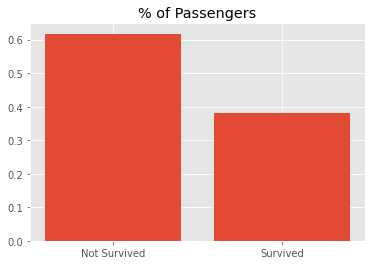

In [6]:
print(train_df.Survived.value_counts(), '\n------------------------------', 
      '\nAverage survival rate is %.2f%%' % (train_df.Survived.mean()*100), 
      '\n------------------------------')

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(['Not Survived','Survived'], train_df.Survived.value_counts()/len(train_df.Survived))
plt.title("% of Passengers")
plt.show()

        count      mean
Pclass                 
1         214  0.626168
2         184  0.472826
3         491  0.242363 
------------------------------


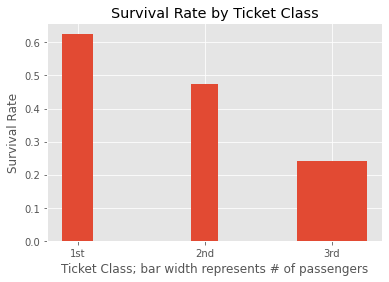

In [7]:
print(train_df.groupby(['Pclass'])['Survived'].agg(['count', 'mean']), '\n------------------------------')

fig, ax = plt.subplots()
ax.bar(['1st','2nd', '3rd'], train_df.groupby(['Pclass'])['Survived'].mean(), width=train_df.Pclass.value_counts(normalize=True).sort_index())
plt.title("Survival Rate by Ticket Class")
plt.xlabel("Ticket Class; bar width represents # of passengers")
plt.ylabel("Survival Rate")
plt.show()

        count      mean
Sex                    
female    312  0.740385
male      577  0.188908 
------------------------------


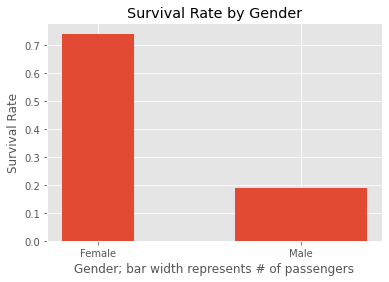

In [8]:
print(train_df.groupby(['Sex'])['Survived'].agg(['count', 'mean']), '\n------------------------------')

fig, ax = plt.subplots()
ax.bar(['Female','Male'], train_df.groupby(['Sex'])['Survived'].mean(), width=train_df.Sex.value_counts(normalize=True).sort_index())
plt.title("Survival Rate by Gender")
plt.xlabel("Gender; bar width represents # of passengers")
plt.ylabel("Survival Rate")
plt.show()

          count      mean
Embarked                 
C           168  0.553571
Q            77  0.389610
S           644  0.336957 
------------------------------


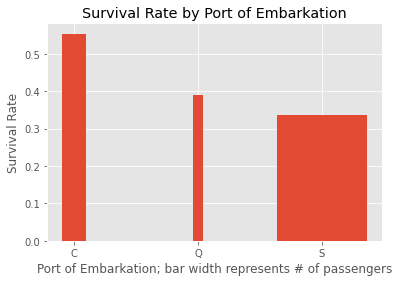

In [9]:
print(train_df.groupby(['Embarked'])['Survived'].agg(['count', 'mean']), '\n------------------------------')

fig, ax = plt.subplots()
ax.bar(['C','Q', 'S'], train_df.groupby(['Embarked'])['Survived'].mean(), width=train_df.Embarked.value_counts(normalize=True).sort_index())
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Port of Embarkation; bar width represents # of passengers")
plt.ylabel("Survival Rate")
plt.show()

       count      mean
SibSp                 
0        606  0.343234
1        209  0.535885
2         28  0.464286
3         16  0.250000
4         18  0.166667
5          5  0.000000
8          7  0.000000 
------------------------------


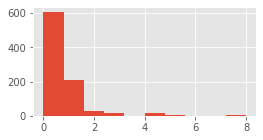

In [10]:
print(train_df.groupby(['SibSp'])['Survived'].agg(['count', 'mean']), '\n------------------------------')

fig, ax = plt.subplots(figsize=(4, 2))
ax.hist(train_df.SibSp)
plt.show()

       count      mean
Parch                 
0        676  0.341716
1        118  0.550847
2         80  0.500000
3          5  0.600000
4          4  0.000000
5          5  0.200000
6          1  0.000000 
------------------------------


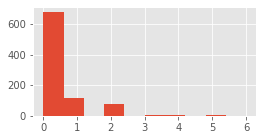

In [11]:
print(train_df.groupby(['Parch'])['Survived'].agg(['count', 'mean']), '\n------------------------------')

fig, ax = plt.subplots(figsize=(4, 2))
ax.hist(train_df.Parch)
plt.show()

          count      mean
Age                      
(0, 10]      64  0.593750
(10, 20]    115  0.382609
(20, 30]    407  0.334152
(30, 40]    154  0.441558
(40, 50]     86  0.383721
(50, 60]     42  0.404762
(60, 70]     16  0.187500 
------------------------------


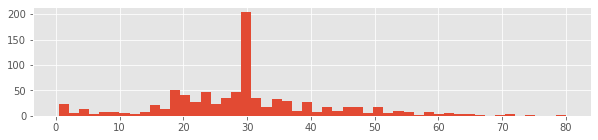

In [12]:
print(train_df.groupby(pd.cut(train_df['Age'], np.arange(0,80,10)))['Survived'].agg(['count', 'mean']), 
      '\n------------------------------')

fig, ax = plt.subplots(figsize=(10, 2))
ax.hist(train_df.Age, bins=50)
plt.show()

            count      mean
Fare                       
(0, 50]       716  0.324022
(50, 100]     105  0.647619
(100, 150]     24  0.791667
(150, 200]      9  0.666667
(200, 250]     11  0.636364 
------------------------------


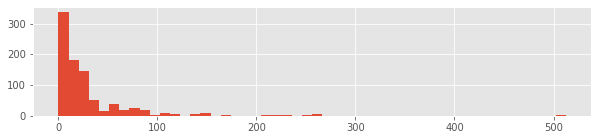

In [13]:
print(train_df.groupby(pd.cut(train_df['Fare'], np.arange(0,300,50)))['Survived'].agg(['count', 'mean']), 
      '\n------------------------------')

fig, ax = plt.subplots(figsize=(10, 2))
ax.hist(train_df.Fare, bins=50)
plt.show()

In [14]:
train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr().style.background_gradient(cmap='coolwarm', axis=None)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


## Model Building

In [15]:
from sklearn.model_selection import train_test_split

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(train_df[features])
y = train_df['Survived']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)
X_test = pd.get_dummies(test_df[features])

### Logistic Regression

First, we try a simple logistic regression with no interaction terms.

In [16]:
from sklearn.linear_model import LogisticRegression

logit1 = LogisticRegression().fit(X_train, y_train)
logit1_pred = logit1.predict(X_validation)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
#Training Accuracy
logit1.score(X_train, y_train)

0.8002812939521801

In [18]:
#Validation Accuracy
logit1.score(X_validation, y_validation)

0.7921348314606742

Next, we would like to test if there is interaction between age/class and gender.

In [19]:
X_train['Age*Sex_male'] = X_train['Age'] * X_train['Sex_male']
X_validation['Age*Sex_male'] = X_validation['Age'] * X_validation['Sex_male']
X_test['Age*Sex_male'] = X_test['Age'] * X_test['Sex_male']

X_train['Pclass*Sex_male'] = X_train['Pclass'] * X_train['Sex_male']
X_validation['Pclass*Sex_male'] = X_validation['Pclass'] * X_validation['Sex_male']
X_test['Pclass*Sex_male'] = X_test['Pclass'] * X_test['Sex_male']

In [20]:
logit2 = LogisticRegression().fit(X_train, y_train)
logit2_pred = logit2.predict(X_validation)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [21]:
#Training Accuracy
logit2.score(X_train, y_train)

0.8171589310829818

In [22]:
#Validation Accuracy
logit2.score(X_validation, y_validation)

0.8089887640449438

In [23]:
logit2_pred_test = logit2.predict(X_test)
#output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': logit2_pred_test})
#output.to_csv('submission.csv', index=False)

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier(n_estimators=100, max_depth=5)
RF1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [25]:
#Training Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train, RF1.predict(X_train))

0.8410689170182841

In [26]:
#Validation Accuracy
accuracy_score(y_validation, RF1.predict(X_validation))

0.8314606741573034

In [27]:
RF1_pred_test = RF1.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': RF1_pred_test})
output.to_csv('submission.csv', index=False)

### Support Vector Machine

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SVM1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [29]:
#Training Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train, SVM1.predict(X_train))

0.8368495077355836

In [30]:
#Validation Accuracy
accuracy_score(y_validation, SVM1.predict(X_validation))

0.8314606741573034